In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import layers
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import cv2
import os

In [2]:
path_parent =os.path.dirname(os. getcwd())
os.chdir(path_parent)

from preprocessing.dane import *

In [9]:
#pobieramy nasz najlepszy model
model = tf.keras.models.load_model("model_dt/model_dt.h5")

In [30]:
#pobieramy nowe zdjecie z folderu
nowe_foto = cv2.imread("nowe_foto/abg.png",cv2.IMREAD_UNCHANGED) # lub png, generalnie pobrany tytuł pliku

#zapisujemy je w skali szarosci
gray = cv2.cvtColor(nowe_foto, cv2.COLOR_BGR2GRAY) 

In [31]:
gray.shape

(190, 118)

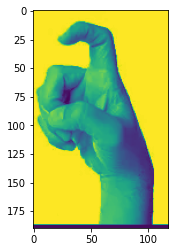

In [32]:
plt.imshow(gray)
plt.show()

In [24]:
#docelowy format zdjęcia w modelu to 28 x 28, dlatego przeskalujmy zdjecie do tego formatu
dim = (28, 28)

resized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)

#ostateczny format wejsciowy do modelu
resized1 =  resized.reshape(-1,28,28,1)

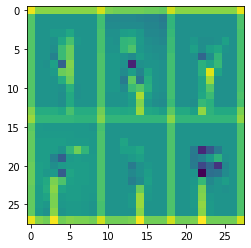

In [25]:
plt.imshow(resized)
plt.show()

In [26]:
#predykcja nowego zdjecia
wynik = model.predict(resized1).argmax(axis = 1)
slownik[wynik[0]]

'T'